<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/WEEK2%E6%8E%88%E6%A5%AD%E5%89%8D%E8%AA%B2%E9%A1%8C%EF%BC%91_%E5%B0%8F%E9%BA%A6%E3%81%A8%E3%83%81%E3%82%A7%E3%82%B9%E7%9B%A4%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

【問題１】2×2マスのチェス盤の小麦の数

In [ ]:
n_squares = 4
indices_of_squares = np.arange(n_squares)
print(indices_of_squares)
small_board_ndarray = 2**indices_of_squares
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

[0 1 2 3]
4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [ ]:
small_board_ndarray_2by2 = small_board_ndarray.reshape(2,2)
print(small_board_ndarray_2by2)

[[1 2]
 [4 8]]


【問題２】n×mマスへの拡張

In [ ]:
def nm_array(n,m,first_square = 1):
  n_squares = n * m
  board_list = [first_square]
  for _ in range(n_squares - 1):
    board_list.append(board_list[-1]*2)
  
  board_ndarray = np.array(board_list)
  return board_ndarray.reshape(n,m)

print(nm_array(8,8,1))

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]]

【問題３】小麦の数の合計

In [ ]:
print("小麦の数の合計は、{}です。".format(nm_array(8,8,1).sum()))

小麦の数の合計は、1.8446744073709552e+19です。


In [ ]:
print("小麦の列の平均は、{}です。".format(nm_array(8,8,1).mean(axis=0)))

小麦の列の平均は、[9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]です。


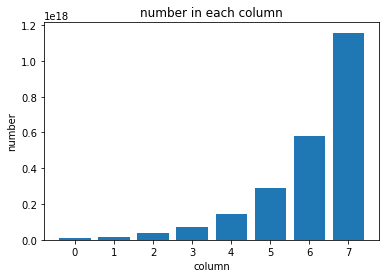

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
left = np.array(range(8))
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(left,nm_array(8,8,1).mean(axis=0))
plt.show()

【問題４】小麦の数のヒートマップ

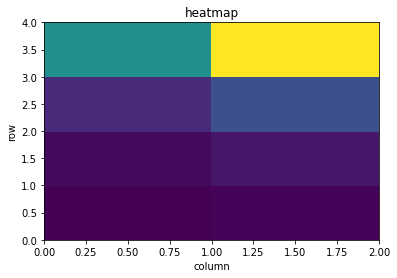

In [ ]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(nm_array(8,8,1).mean(axis=0).reshape(4, 2))
plt.show()

【問題５】後半は前半の何倍か

In [ ]:
n_squares = 32
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2**indices_of_squares
board_ndarray_sum_a = board_ndarray.sum()
print("前半の最後のマスの小麦の合計数：{}".format(board_ndarray_sum_a)) # 9223372036854775808

n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2**indices_of_squares
board_ndarray_sum_b = board_ndarray.sum() - board_ndarray_sum_a
print("後半の最後のマスの小麦の合計数：{}".format(board_ndarray_sum_b)) # 9223372036854775808

print("後半は前半の{}倍です。".format(board_ndarray_sum_b / board_ndarray_sum_a))

前半の最後のマスの小麦の合計数：4294967295
後半の最後のマスの小麦の合計数：18446744069414584320
後半は前半の4294967296.0倍です。


【問題６】他の計算方法によるn×mマスへの拡張

In [ ]:
def ndarray_append(n,m,first_square = 1):
  n_square = n * m
  small_board_ndarray = np.array([first_square])
  for _ in range(n_square - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1].astype(np.uint64))
  return small_board_ndarray.astype(np.uint64)

print(ndarray_append(8,8))

[                  1                   2                   4
                   8                  16                  32
                  64                 128                 256
                 512                1024                2048
                4096                8192               16384
               32768               65536              131072
              262144              524288             1048576
             2097152             4194304             8388608
            16777216            33554432            67108864
           134217728           268435456           536870912
          1073741824          2147483648          4294967296
          8589934592         17179869184         34359738368
         68719476736        137438953472        274877906944
        549755813888       1099511627776       2199023255552
       4398046511104       8796093022208      17592186044416
      35184372088832      70368744177664     140737488355328
     281474976710656    

In [ ]:
def ndarray_broadcast(n,m,first_square = 1):
  n_square = n * m
  small_board_square = np.arange(n_square)
  small_board_ndarray2 = 2**small_board_square.astype(np.uint64)
  return small_board_ndarray2

print(ndarray_broadcast(8,8))

[                  1                   2                   4
                   8                  16                  32
                  64                 128                 256
                 512                1024                2048
                4096                8192               16384
               32768               65536              131072
              262144              524288             1048576
             2097152             4194304             8388608
            16777216            33554432            67108864
           134217728           268435456           536870912
          1073741824          2147483648          4294967296
          8589934592         17179869184         34359738368
         68719476736        137438953472        274877906944
        549755813888       1099511627776       2199023255552
       4398046511104       8796093022208      17592186044416
      35184372088832      70368744177664     140737488355328
     281474976710656    

【問題7】計算時間の比較

In [ ]:
%%timeit
n_squares = 64
first_square = 1
board_list = [first_square]
for _ in range(n_squares - 1):
  board_list.append(board_list[-1]*2)
  
board_ndarray = np.array(board_list)

19.7 µs ± 836 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%%timeit
n_square = 64
first_square = 1
board_list = np.array([first_square])
for _ in range(n_square - 1):
  board_list = np.append(board_list, 2*board_list[-1])

<magic-timeit>:5: RuntimeWarning: overflow encountered in long_scalars


516 µs ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
n_square = 64
first_square = 1
board_list = np.arange(n_square)
board_list = 2**board_list

2.91 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
